**1.Importing Dataset**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1_AyRmxnWgJ_AiGZZ0wgl-3BzuE2GmOZ9

Downloading...
From: https://drive.google.com/uc?id=1_AyRmxnWgJ_AiGZZ0wgl-3BzuE2GmOZ9
To: /content/openaq.json
100% 18.9M/18.9M [00:00<00:00, 61.7MB/s]


In [ ]:
df = pd.read_json("openaq.json")


***2.Basic statistics***

In [ ]:
df.head()

,country,city,location,coordinates,measurements_parameter,measurements_sourcename,measurements_unit,measurements_value,measurements_lastupdated,country_name_en
0,AT,Austria,Fürstenfeld,"{'lon': 16.0789452704553, 'lat': 47.0469446299...",NO2,EEA Austria,µg/m³,53.000,2016-12-12T15:00:00+06:00,Austria
1,AT,Austria,Hainburg,"{'lon': 16.9610908794607, 'lat': 48.1439111304...",PM10,EEA Austria,µg/m³,7.000,2016-12-12T15:00:00+06:00,Austria
2,AT,Austria,St. Koloman Kleinhorn,"{'lon': 13.2333519449499, 'lat': 47.6505835144...",O3,EEA Austria,µg/m³,69.000,2016-12-12T14:00:00+06:00,Austria
3,AU,South East Queensland,Flinders View,"{'lon': 152.7741, 'lat': -27.6528}",O3,Australia - Queensland,ppm,0.005,2023-05-09T21:00:00+06:00,Australia
4,AU,Gladstone,Fisherman's Landing,"{'lon': 151.1601, 'lat': -23.7937}",SO2,Australia - Queensland,ppm,0.000,2018-05-10T12:00:00+06:00,Australia


In [ ]:
type(df['coordinates'][0] )

dict

In [ ]:
df.columns

Index(['country', 'city', 'location', 'coordinates', 'measurements_parameter',
       'measurements_sourcename', 'measurements_unit', 'measurements_value',
       'measurements_lastupdated', 'country_name_en'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   52308 non-null  object 
 1   city                      52308 non-null  object 
 2   location                  52308 non-null  object 
 3   coordinates               48265 non-null  object 
 4   measurements_parameter    52308 non-null  object 
 5   measurements_sourcename   52308 non-null  object 
 6   measurements_unit         52308 non-null  object 
 7   measurements_value        52308 non-null  float64
 8   measurements_lastupdated  52308 non-null  object 
 9   country_name_en           52202 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.0+ MB


In [ ]:
df.shape

(52308, 10)

In [ ]:
df.describe()

,measurements_value
count,5.230800e+04
mean,1.051103e+03
std,4.449739e+04
min,-4.905140e+04
25%,1.500000e+00
50%,1.100000e+01
75%,4.000000e+01
max,7.242422e+06



**3.Data Cleaning**

In [ ]:
df.isnull().sum()

country                        0
city                           0
location                       0
coordinates                 4043
measurements_parameter         0
measurements_sourcename        0
measurements_unit              0
measurements_value             0
measurements_lastupdated       0
country_name_en              106
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

country                     0
city                        0
location                    0
coordinates                 0
measurements_parameter      0
measurements_sourcename     0
measurements_unit           0
measurements_value          0
measurements_lastupdated    0
country_name_en             0
dtype: int64

**4. Preparing Dataset for next step**

In [ ]:
df['latitude'] = df['coordinates'].apply(lambda x: x['lat']).astype(float)
df['longitude'] = df['coordinates'].apply(lambda x: x['lon']).astype(float)


In [ ]:
df.drop('coordinates', axis=1, inplace=True)

In [ ]:
df.head(2)

,country,city,location,measurements_parameter,measurements_sourcename,measurements_unit,measurements_value,measurements_lastupdated,country_name_en,latitude,longitude
0,AT,Austria,Fürstenfeld,NO2,EEA Austria,µg/m³,53.0,2016-12-12T15:00:00+06:00,Austria,47.046945,16.078945
1,AT,Austria,Hainburg,PM10,EEA Austria,µg/m³,7.0,2016-12-12T15:00:00+06:00,Austria,48.143911,16.961091


In [ ]:

value_counts = df['measurements_parameter'].value_counts()

# Keep values where the count is more than 500
filtered_values = value_counts[value_counts > 300]

# Get the values as a list
result = filtered_values.index.tolist()

# Print the result
print(result)


['NO2', 'PM2.5', 'O3', 'PM10', 'SO2', 'CO', 'NO', 'NOX']


In [ ]:
# create a new column to store the converted values
df['measurements_value_ppm'] = 0

# loop through each row and convert the values from µg/m³ to ppm
for i, row in df.iterrows():
    if row['measurements_unit'] == 'µg/m³':
        # convert to ppm using the molecular weight of the substance
        # assume the molecular weight is 100 g/mol for this example
        ppm_value = (row['measurements_value'] * 0.001)
        df.at[i, 'measurements_value_ppm'] = ppm_value
    else:
        # keep the original value if it's already in ppm
        df.at[i, 'measurements_value_ppm'] = row['measurements_value']

# drop the original measurements_value column
df = df.drop(columns=['measurements_value'])

# rename the measurements_value_ppm column to measurements_value
df = df.rename(columns={'measurements_value_ppm': 'measurements_value'})
df = df[['country_name_en','city','measurements_parameter','measurements_value']]

In [ ]:
df

,country_name_en,city,measurements_parameter,measurements_value
0,Austria,Austria,NO2,0.05300
1,Austria,Austria,PM10,0.00700
2,Austria,Austria,O3,0.06900
3,Australia,South East Queensland,O3,0.00500
4,Australia,Gladstone,SO2,0.00000
...,...,...,...,...
52303,India,Dehradun,CO,0.20000
52304,India,Dehradun,SO2,0.00270
52305,India,Gangtok,O3,0.02325
52306,India,Imphal,SO2,0.03199


**5.Understand co-relation between variables**

In [ ]:
df.measurements_parameter.unique()

array(['NO2', 'PM10', 'O3', 'SO2', 'PM2.5', 'CO', 'NO', 'NOX', 'BC',
       'PM1'], dtype=object)

<Axes: xlabel='measurements_parameter', ylabel='measurements_value'>

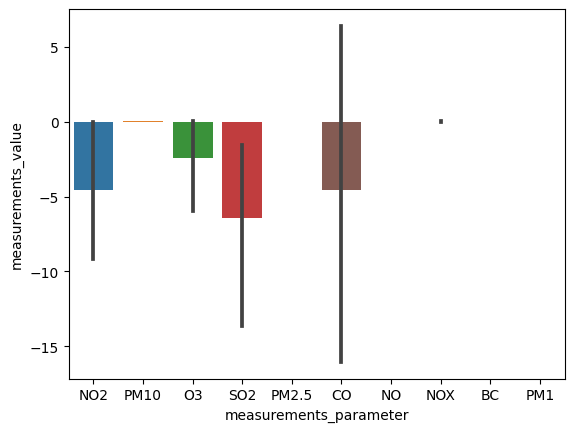

In [ ]:
sns.barplot(data=df, x="measurements_parameter", y="measurements_value", hue=None)


<Axes: xlabel='measurements_parameter', ylabel='measurements_value'>

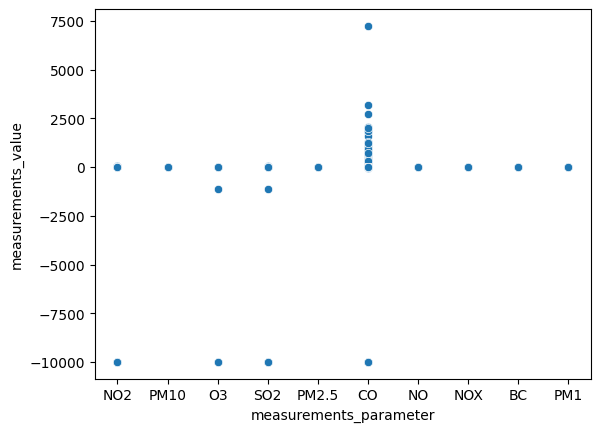

In [ ]:
sns.scatterplot(data=df, x="measurements_parameter", y="measurements_value", hue=None)


**5.Linear Regression**

In [ ]:
df.head(2)

,country_name_en,city,measurements_parameter,measurements_value
0,Austria,Austria,NO2,0.053
1,Austria,Austria,PM10,0.007


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score


# Define the feature variable (X) and the target variable (y)
X = df[['measurements_parameter']]
y = df['measurements_value']

# Perform one-hot encoding on the feature variable
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

# Normalize the feature variable using standardization
scaler = StandardScaler(with_mean=False)  # Pass with_mean=False for sparse matrix support
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Since f1 score is typically used for classification tasks, it may not be directly applicable to this regression problem.
# If you have specific thresholds or categories for the target variable, you can use them to create a classification task and calculate the f1 score.


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Absolute Error: 8.873658525521531
R-squared: -0.0009001988382519865


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)
rmse_linear = rmse
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 220.33184352452756


** 7.Feature engineering and testing model**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def calculate_rmse(X, y):
    # Perform one-hot encoding on the categorical columns
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Normalize the feature variable using standardization
    scaler = StandardScaler(with_mean=False)
    X_scaled = scaler.fit_transform(X_encoded)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse


In [ ]:
# Define the feature variables (X) and the target variable (y)
X = df[['measurements_parameter']]
y = df['measurements_value']

# Test the RMSE function with different feature combinations
rmse_1 = calculate_rmse(X, y)
rmse_feature = rmse_1
# Create a new feature combination by adding more features to X
X_new = df[['measurements_parameter', 'country_name_en', 'city']]

rmse_2 = calculate_rmse(X_new, y)

# Compare the RMSE values
print("RMSE with feature combination 1:", rmse_1)
print("RMSE with feature combination 2:", rmse_2)


RMSE with feature combination 1: 220.33184411774621
RMSE with feature combination 2: 4592704879988208.0


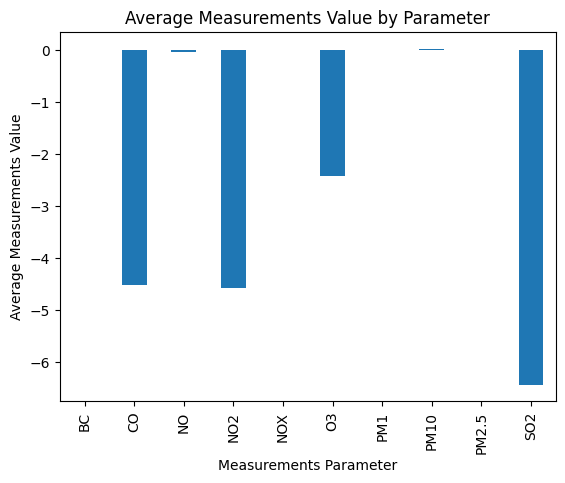

In [ ]:
import matplotlib.pyplot as plt

df.groupby('measurements_parameter')['measurements_value'].mean().plot(kind='bar')
plt.xlabel('Measurements Parameter')
plt.ylabel('Average Measurements Value')
plt.title('Average Measurements Value by Parameter')
plt.show()



**8) Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the feature variables (X) and the target variable (y)
X = df[['measurements_parameter']]
y = df['measurements_value']

# Perform one-hot encoding on the categorical feature
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a decision tree regressor model
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_destree = rmse
print("RMSE:", rmse)


RMSE: 220.33184411774621


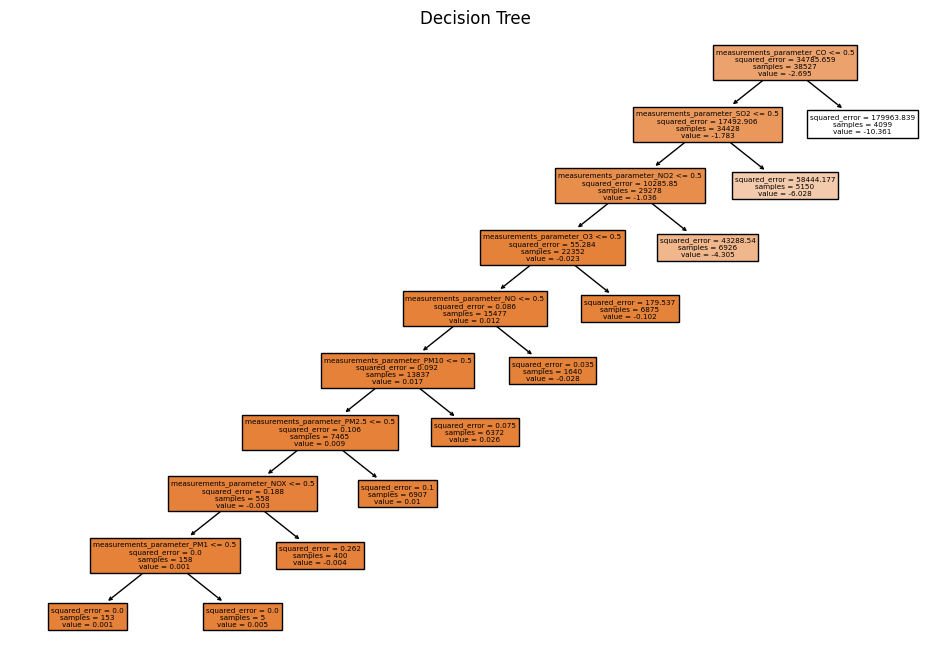

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=X_encoded.columns, filled=True)
plt.title('Decision Tree')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

# Decision Tree Regression
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
tree_pred = regressor.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))

print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree Regression RMSE:", tree_rmse)


Linear Regression RMSE: 220.33184411774621
Decision Tree Regression RMSE: 220.33184411774621


**9) Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the feature variables (X) and the target variable (y)
X = df[['measurements_parameter']]
y = df['measurements_value']

# Perform one-hot encoding on the categorical feature
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor model
regressor = RandomForestRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_randfor = rmse
print("RMSE:", rmse)


RMSE: 220.33956346161028


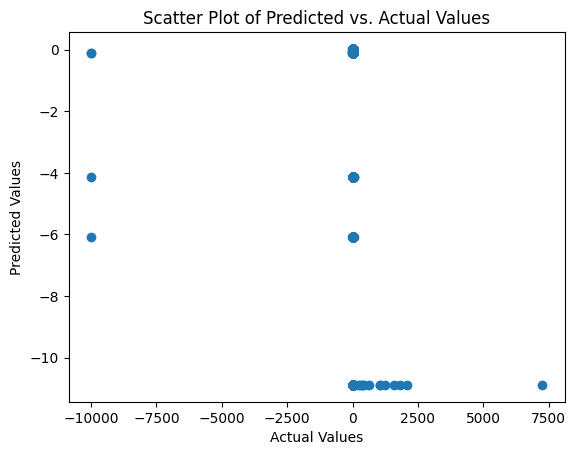

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()


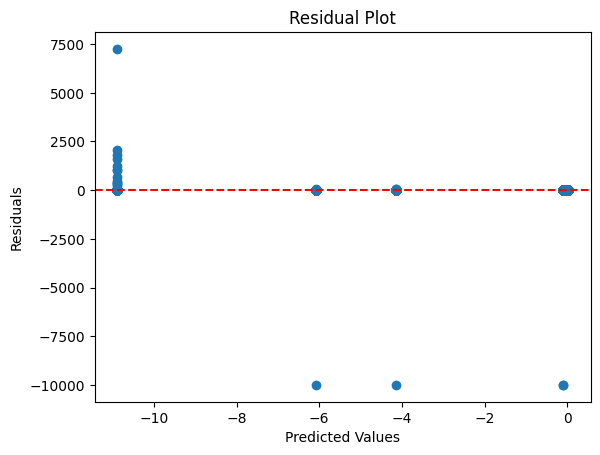

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


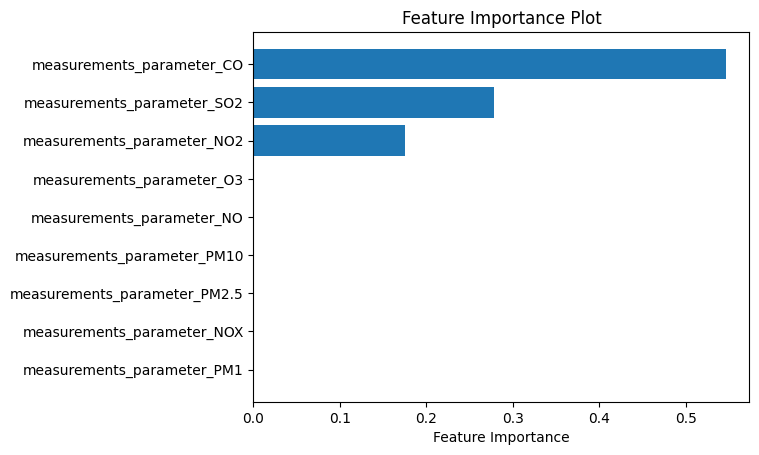

In [ ]:
feature_importance = regressor.feature_importances_
feature_names = X_encoded.columns

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()


**10) Support Vector Machine**

RMSE: 220.24005849631234


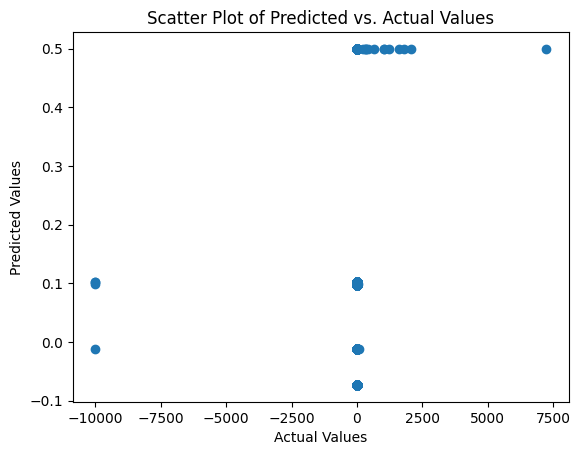

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Define the feature variables (X) and target variable (y)
X = df[['measurements_parameter']]
y = df['measurements_value']

# Perform one-hot encoding on the categorical feature
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Convert the sparse matrix to a dense matrix
X_encoded_dense = X_encoded.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_dense, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler(with_mean=False)  # Set with_mean=False to avoid the centering error
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svr = SVR(kernel='rbf')  # You can choose different kernels based on your data and problem
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_svm = rmse
print("RMSE:", rmse)

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()


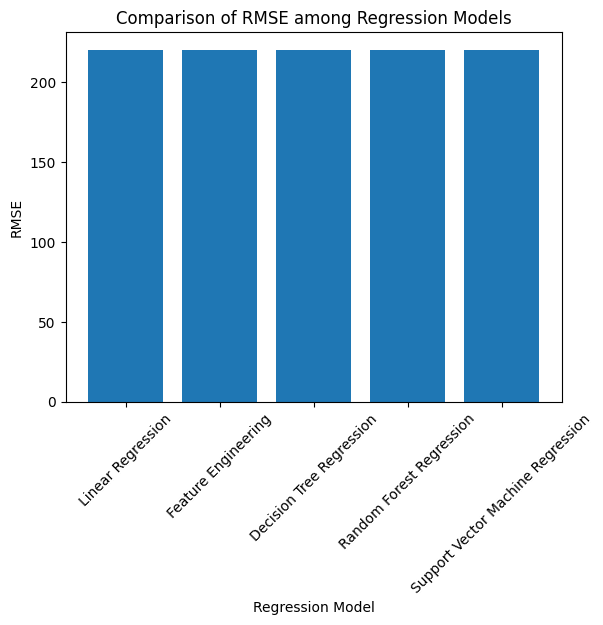

In [ ]:
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [rmse_linear, rmse_feature, rmse_destree, rmse_randfor, rmse_svm]
model_names = ['Linear Regression', 'Feature Engineering', 'Decision Tree Regression', 'Random Forest Regression', 'Support Vector Machine Regression']

# Compare the RMSE values
plt.bar(model_names, rmse_values)
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE among Regression Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Threshold for classification
threshold = 0.05

# Convert predicted values to classes
y_pred_linear_class = [1 if pred >= threshold else 0 for pred in y_pred_linear]
y_pred_feature_class = [1 if pred >= threshold else 0 for pred in y_pred_feature]
y_pred_destree_class = [1 if pred >= threshold else 0 for pred in y_pred_destree]
y_pred_randfor_class = [1 if pred >= threshold else 0 for pred in y_pred_randfor]
y_pred_svm_class = [1 if pred >= threshold else 0 for pred in y_pred_svm]

# Calculate accuracy scores
accuracy_linear = accuracy_score(y_test_class, y_pred_linear_class)
accuracy_feature = accuracy_score(y_test_class, y_pred_feature_class)
accuracy_destree = accuracy_score(y_test_class, y_pred_destree_class)
accuracy_randfor = accuracy_score(y_test_class, y_pred_randfor_class)
accuracy_svm = accuracy_score(y_test_class, y_pred_svm_class)

# Print the accuracy scores
print("Accuracy Score - Linear Regression:", accuracy_linear)
print("Accuracy Score - Feature Engineering:", accuracy_feature)
print("Accuracy Score - Decision Tree Regression:", accuracy_destree)
print("Accuracy Score - Random Forest Regression:", accuracy_randfor)
print("Accuracy Score - Support Vector Machine Regression:", accuracy_svm)


NameError: ignored